# ***College Event Feedback Analysis***

# NAME :- B SANTOSH KUMAR

#Project Overview

College events like tech fests, workshops, and cultural activities collect feedback — but are we using it meaningfully?

In this project, interns will analyze text and rating-based feedback submitted by students after attending campus events. You’ll work with simulated or real Google Forms data (CSV) and use basic Natural Language Processing (NLP) to understand satisfaction levels and identify areas for improvement.

# ***Importing the libraries***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

# ***Configure the plotting***

In [ ]:
#configure plotting
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

### Loading the datasets
1. Student_Satisfaction_Survey.csv
2.student_feedback.csv

In [ ]:
#Load the dataset
df1 = pd.read_csv('/content/student_feedback.csv')
df2 = pd.read_csv('/content/Student_Satisfaction_Survey.csv', encoding='ISO-8859-1')

In [36]:
df1.columns

Index(['Student ID', 'Well versed with the subject',
       'Explains concepts in an understandable way', 'Use of presentations',
       'Degree of difficulty of assignments', 'Solves doubts willingly',
       'Structuring of the course',
       'Provides support for students going above and beyond',
       'Course recommendation based on relevance', 'Average_Score'],
      dtype='object')

In [37]:
df2.columns

Index(['SN', 'Total Feedback Given', 'Total Configured', 'Questions',
       'Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4',
       'Weightage 5', 'Average/ Percentage', 'Course Name', 'Basic Course',
       'Total_Responses', 'Computed_Average'],
      dtype='object')

#cleaning dataset1
1. What is Unnamed: 0?
When a CSV file is saved from tools like Excel or pandas with index=True (the default), the row numbers (indexes) are also saved as a column.

- This creates an unnecessary column named "Unnamed: 0" when the CSV is read again, as the index is already automatically handled by pandas.

2. What does drop(..., inplace=True) do?
drop(columns=['Unnamed: 0']) tells pandas to remove the specified column.

- inplace=True ensures the operation modifies df1 directly, without creating a new copy.



In [ ]:
# Clean df1: Drop unnecessary columns
df1.drop(columns=['Unnamed: 0'], inplace=True)

# cleaning dataset 2
- This removes any leading or trailing spaces from column names in df2.
- Why it's important:
 - Sometimes, CSV or Excel files have hidden whitespace in column names, causing bugs like:

 - KeyError: 'Computed_Average' (even if it looks like the column exists)

 - Problems during merging, plotting, or filtering.

In [ ]:
# Clean df2: Clean column names
df2.columns = df2.columns.str.strip()

**We're calculating the average satisfaction score given by each student. First, you ignore the "Student ID" column, then you take the average of all the rating columns for every student and store it in a new column called "Average_Score"**

In [ ]:
# Calculate average satisfaction scores from df1
rating_columns = df1.columns.drop('Student ID')
df1['Average_Score'] = df1[rating_columns].mean(axis=1)

# CHART -1 HISTOGRAM OF NO OF STUDENTS & AVG SCORE


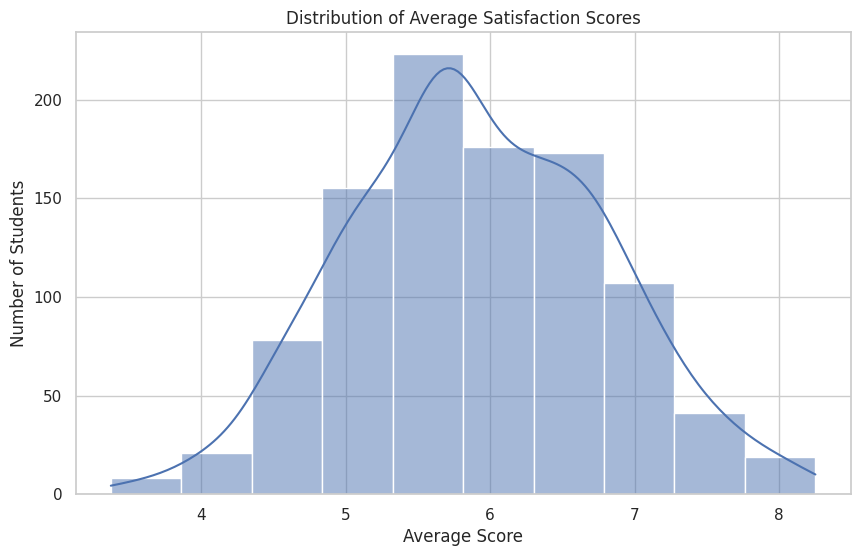

In [ ]:
# Plot: Overall satisfaction score distribution (df1)
sns.histplot(df1['Average_Score'], bins=10, kde=True)
plt.title('Distribution of Average Satisfaction Scores')
plt.xlabel('Average Score')
plt.ylabel('Number of Students')
plt.show()


- The histogram displays the distribution of average satisfaction scores among students.

- The x-axis shows the average score ranges, divided into 10 bins.

- The y-axis shows the number of students who fall into each score range.

- The KDE (smooth curve) shows the overall trend or shape of the score distribution.

- Helps identify whether most students gave high, medium, or low ratings.

## Chart 2:- Bar plot score and question

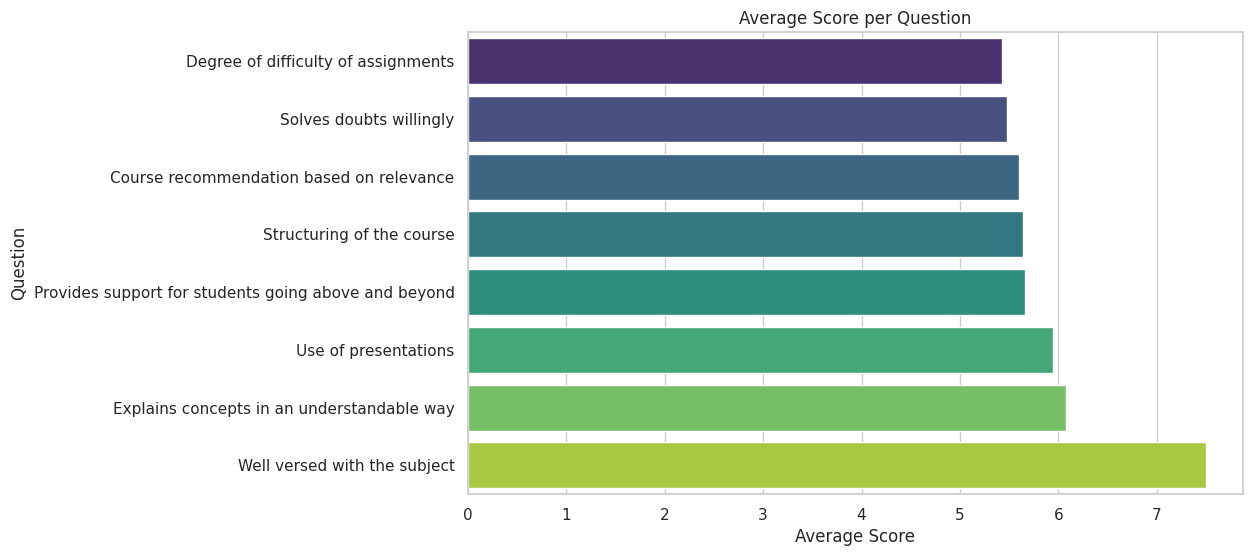

In [ ]:
#  Plot: Average score per question (df1)
avg_per_question = df1[rating_columns].mean().sort_values()

sns.barplot(
    x=avg_per_question.values,
    y=avg_per_question.index,
    hue=avg_per_question.index,  # setting hue
    palette='viridis',
    dodge=False,
    legend=False
)

plt.title('Average Score per Question')
plt.xlabel('Average Score')
plt.ylabel('Question')
plt.show()


- "Well versed with the subject" received the highest average score, reflecting strong subject knowledge.

- "Explains concepts clearly" and "Use of presentations" also scored well, indicating effective teaching methods.

- Lower scores for "Solves doubts willingly" and "Difficulty of assignments" suggest areas needing improvement in student support and assignment clarity.

- First, the total number of responses for each question is calculated by adding up how many students gave ratings from 1 to 5.

- Then, the weighted average score is computed by multiplying each rating value (1 to 5) by the number of times it was given, summing those values, and dividing by the total number of responses.

- This gives a more accurate average that considers both the rating and how many students selected it.

In [ ]:
# Compute computed average from df2 (weighted average)
df2['Total_Responses'] = df2[[f'Weightage {i}' for i in range(1, 6)]].sum(axis=1)
df2['Computed_Average'] = sum(df2[f'Weightage {i}'] * i for i in range(1, 6)) / df2['Total_Responses']


# Bar plot of AVG rating per question

- Cleans the data by replacing curly/smart apostrophes in the "Questions" column with regular apostrophes to avoid font or display issues.

- Sorts the questions based on their computed average scores in descending order (highest to lowest).

- Creates a horizontal bar chart where:

- The y-axis shows the questions.

- The x-axis shows the computed average scores.

- Each bar's color comes from the "coolwarm" color palette, and each question is used as a hue to apply different shades.

- The legend is turned off to avoid clutter since each question is already labeled on the y-axis.

- The chart shows how well each question scored on average, making it easy to compare satisfaction levels across different areas.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


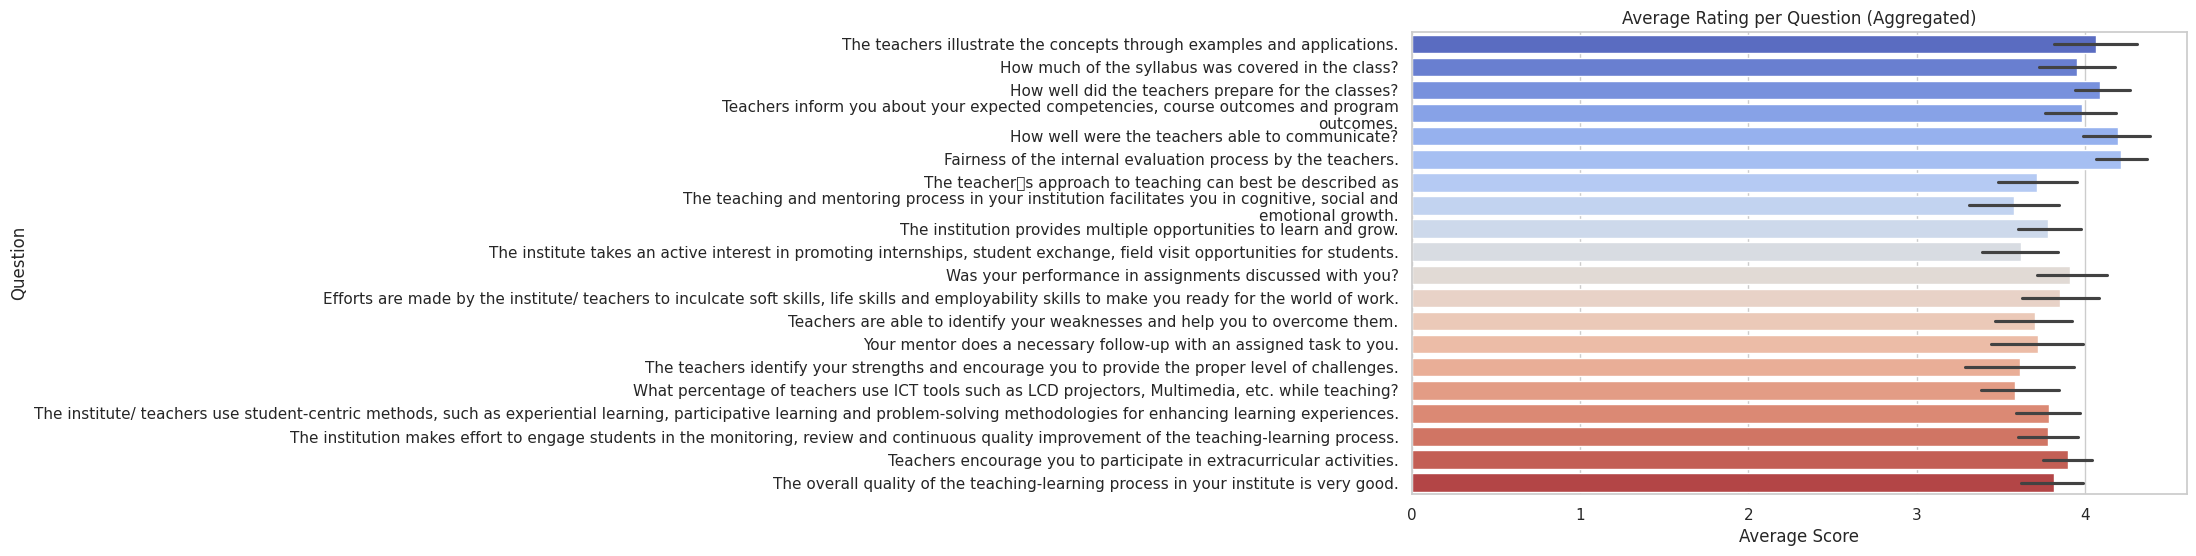

In [ ]:
#  Average satisfaction by Question (df2)
df2['Questions'] = df2['Questions'].str.replace('’', "'", regex=False)

top_questions = df2[['Questions', 'Computed_Average']].sort_values(by='Computed_Average', ascending=False)

sns.barplot(
    data=top_questions,
    x='Computed_Average',
    y='Questions',
    hue='Questions',
    palette='coolwarm',
    dodge=False,
    legend=False
    )

plt.title('Average Rating per Question (Aggregated)')
plt.xlabel('Average Score')
plt.ylabel('Question')
plt.show()


# word plot of feedback question

In [ ]:
# Word Cloud: Top feedback questions (df2)
text = ' '.join(df2['Questions'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

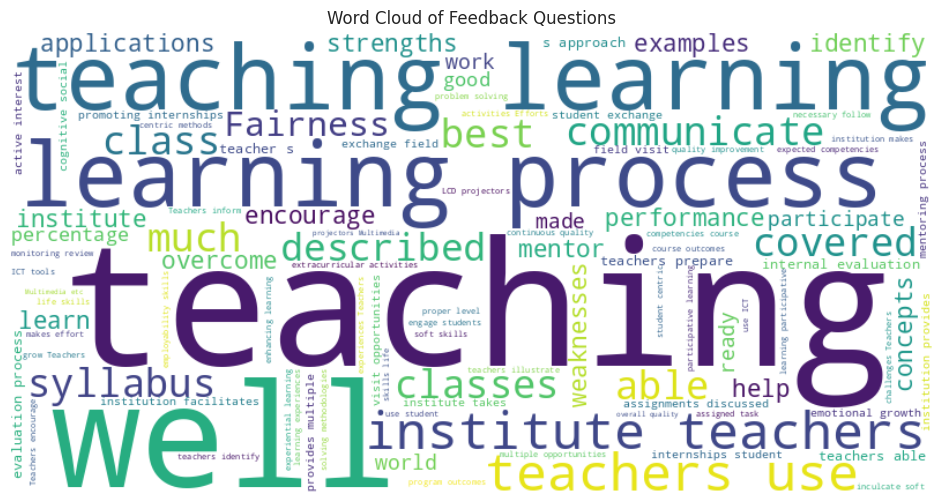

In [ ]:
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Feedback Questions")
plt.show()


# Suggestions for improvement

In [ ]:
print("\nSuggestions for Improvement:")
low_avg_questions = top_questions[top_questions['Computed_Average'] < 3.5]
for _, row in low_avg_questions.iterrows():
    print(f"• {row['Questions']} → Avg Score: {row['Computed_Average']:.2f}")


Suggestions for Improvement:
• The institution provides multiple opportunities to learn and grow. → Avg Score: 3.48
• The institute takes an active interest in promoting internships, student exchange, field visit opportunities for students. → Avg Score: 3.48
• The teachers identify your strengths and encourage you to provide the proper level of challenges. → Avg Score: 3.44
• The teaching and mentoring process in your institution facilitates you in cognitive, social and
emotional growth. → Avg Score: 3.44
• How well were the teachers able to communicate? → Avg Score: 3.43
• Was your performance in assignments discussed with you? → Avg Score: 3.43
• The teaching and mentoring process in your institution facilitates you in cognitive, social and
emotional growth. → Avg Score: 3.43
• The institution provides multiple opportunities to learn and grow. → Avg Score: 3.43
• Your mentor does a necessary follow-up with an assigned task to you. → Avg Score: 3.43
• The institute takes an active in